In [ ]:
!pip install scikit-learn

In [ ]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X_df = wine_quality.data.features 
y_df = wine_quality.data.targets 
  
# # metadata 
# print(wine_quality.metadata) 
  
# # variable information 
# print(wine_quality.variables) 


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Starting the exploratory data analysis. To perform standard pandas operations, I need to convert X and y (which are the features and targets of the dataset, respectively) into pandas DataFrames. I plan to check columns to understand datatypes, value ranges, find possible missing values, the correlation between features, and create relevant data visualizations.

<span style="color: green">Not sure why you are concating your labels and features speically that you have to seperate them later... just feels redundant but i'll go through the next steps to see how you are using the X+y dataframe.</span>

<span style="color: green">
also it's good practice to use `_` in your varialbe names like `wine_df`. I personally like to put `df` or `list` or other datatypes up top so when i type df.. and press tab i can see all my dataframes. long story short, i like to name it  `df_wine` </span>


In [8]:
winedf = pd.concat([X_df, y_df], axis=1)

In [10]:
winedf.head()

#winedf.columns

#winedf.isnull().sum()

#winedf.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#Great no null values! So I dont have to worry about dropping any rows and my chances of missing data or data that was inputted wrong is lower.

#These data types seem to be correct considering most of htem are percentages in decimal form float64 for would be the best Dtype for them. I also see the quality is int64 I beleive this column is the quality ratings given to each wine which would be whole numbers.

In [11]:
wine_quality.data

{'ids': None,
 'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 6492            6.2              0.21         0.29             1.6      0.039   
 6493            6.6              0.32         0.36             8.0      0.047   
 6494            6.5              0.24         0.19             1.2      0.041   
 6495            5.5              0.29         0.30             1.1      0.022   
 6496            6.0              0.21         0.38             0.8     

I was having trouble finding the color column with the code given by the UCI to call the data into python. I believe they made a new datasheet to remove the color column. However, for our assignment I have to hot code a catergorical variable and color is the only catergorical column. After running "wine_quality.data" I was able to find the column under "original" so my next step it to pull out the orginal datset and work on that moving forward. 

In [12]:
original_data = wine_quality.data['original']
original_data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [13]:
original_data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [14]:
original_data.head

<bound method NDFrame.head of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020  

/var/folders/b0/dcyq0pv101z20t4wq5dtl9qc0000gn/T/ipykernel_53394/2139850534.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


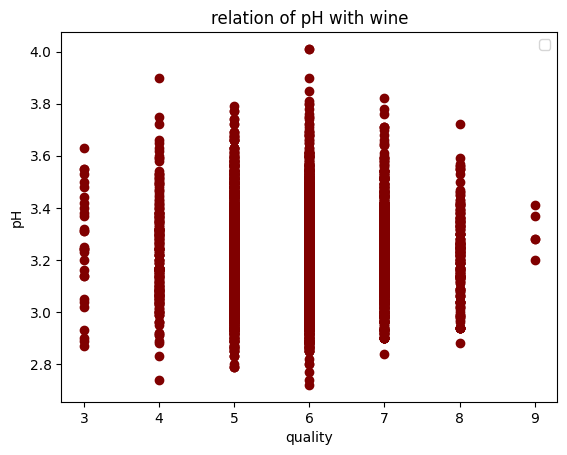

In [15]:
#time for wine colored graphs

plt.scatter(original_data['quality'], original_data['pH'], color = 'maroon')
plt.title('relation of pH with wine')
plt.xlabel('quality')
plt.ylabel('pH')
plt.legend()
plt.show()

<span style="color: green"> i suggest being consistent in your graphs so i f you used `qaulity` as x axis in one chart, don't swithc it to y axis in the next one </span>

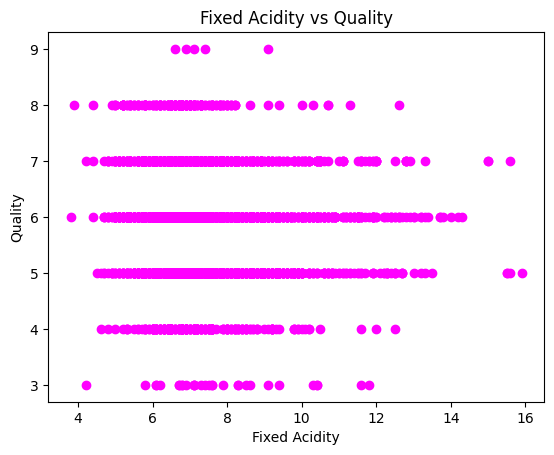

In [16]:
plt.title('Fixed Acidity vs Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.scatter(original_data['fixed_acidity'], original_data['quality'], color = 'magenta')
plt.show()

<span style="color: green"> Go one step deeper than just visualizing.for example,  can you observe if there is any trend or relationship between quality and pH? </span>

In [17]:
plt.bar(data['quality'], data['alcohol'], color = 'pink')
plt.title('relation of alcohol to wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

NameError: name 'data' is not defined

<span style="color: green"> data doesn't exist. did you mean originaldata? that's why it's important to constantly reset your kernel and run everything from the top of your notebook </span>

In [18]:
import seaborn as sns

In [22]:
#Spliting data in two like above

X = original_data.drop(columns=['quality'])  # Features
y = original_data['quality']

print(X.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color'],
      dtype='object')


In [23]:
X.shape, y.shape

((6497, 12), (6497,))

<Axes: >

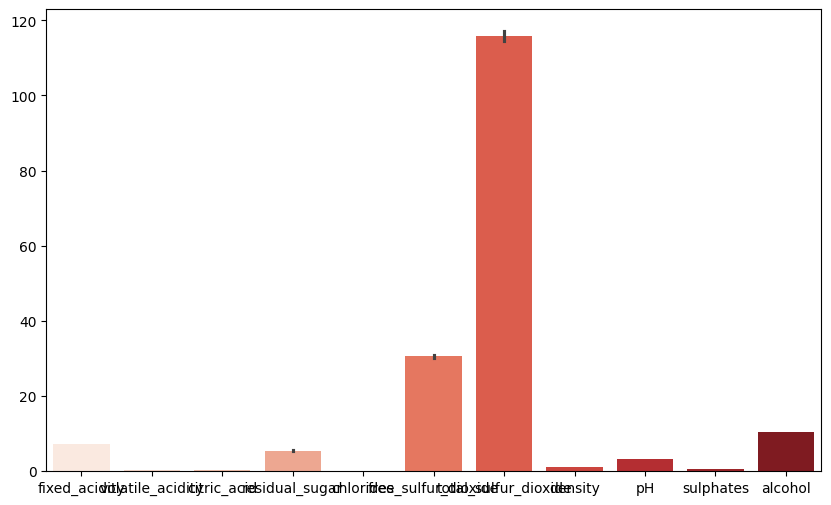

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(X, palette = 'Reds')

Ran into a ValueError when trying to create a correlation matrix so I am going to bring back the features list from the updated dataset because that does not include the color and target(quality) columns.

<span style="color: green"> I can read the labels! have empthay for your audience. make your charts legible.  use something like `plt.xlabel('Features', rotation=45)` to rotate the labels.

<span style="color: green"> also always name your axis

In [26]:
corr = winedf.corr()
print(corr)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

The corrrelation matrix is great to know when proceeding but i belive I will be able to absorb the information better if visualize it.

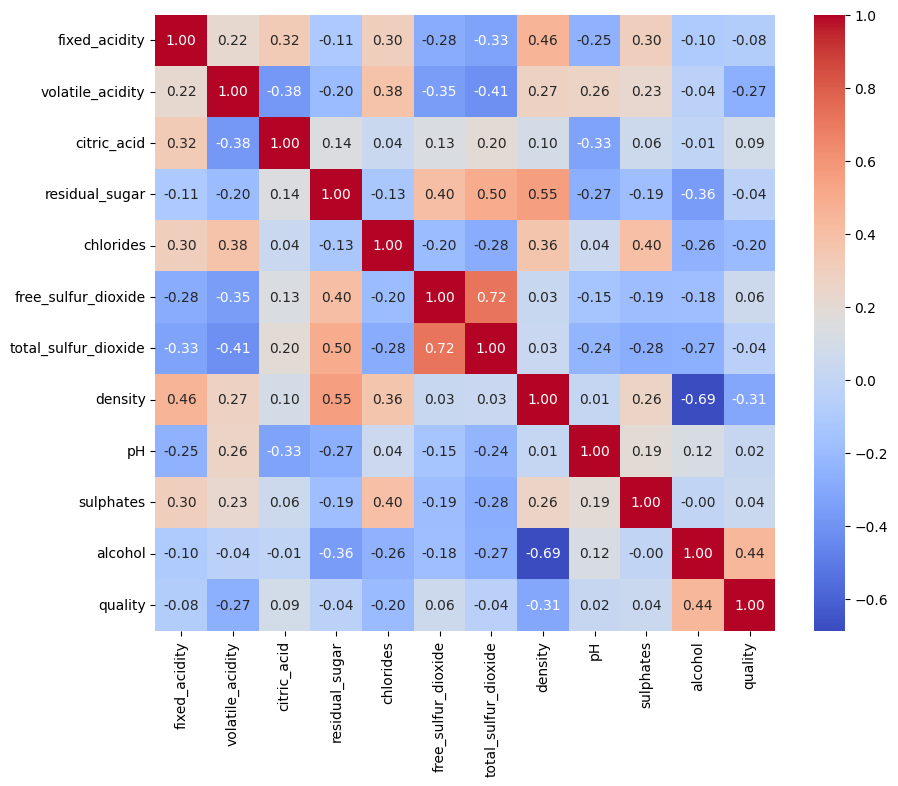

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

From the correlation matrix and plot we can see which features have strong correlation and which features do not. I belive this will be inportant in the future when determining which columns are the most revelant. The alcohol content of the wine has a high correlation with the wine quality. This is important to note because wine quality is what we will working closely with. Some features have negative correlation like density. I plan to remove the features with the most correlation to quality to eliminate some noise if I need to.

<span style="color: green"> correlation between alcohol and quality is 0.44. i beleive you meant `alcohol` and `density` have relatively higher correlation comaring to other features pairs

In [28]:
sns.pairplot(original_data, hue='color')

Error in callback <function flush_figures at 0x1150722a0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Prediction: I'm not seeing any strong linear relationships in my exploratory graphs. That the random forest will have higher accuracy and F1 scores.

Okay now that I have done all of my exploratory analysis I feel confident to move on to the next step. During my exploratory analysis I did not find any missing values, I know the dtypes of all my columns, and I was able to see the correlation beetween categories. Next I will create a sklearn pipeline that includes preprocessing steps such as scaling and one hot encoding of categorical variable. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4547, 12), (1950, 12), (4547,), (1950,))

In [32]:
x_test.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3103            7.0              0.17         0.74            12.8      0.045   
1419            7.7              0.64         0.21             2.2      0.077   
4761            6.8              0.39         0.34             7.4      0.020   
4690            6.3              0.28         0.47            11.2      0.040   
4032            7.4              0.35         0.20            13.9      0.054   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
3103                 24.0                 126.0  0.99420  3.26       0.38   
1419                 32.0                 133.0  0.99560  3.27       0.45   
4761                 38.0                 133.0  0.99212  3.18       0.44   
4690                 61.0                 183.0  0.99592  3.12       0.51   
4032                 63.0                 229.0  0.99888  3.11       0.50   

      alcohol  color  
3103     12.2  white  
1419      9.9    red  
4761     12.0  white  
4690      9.5  white  
4032      8.9  white

In [33]:
num_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
cat_cols = ['color']

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  # One-hot encode categorical features
    ])


The first model I will train will be Logicregression

In [34]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), ('model', LogisticRegression())])

In [35]:
pipe.fit(x_train, y_train)


# calculating the training and testing accuracies
print("Training accuracy :", pipe.score(x_train, y_train))
print("Testing accuracy :", pipe.score(x_test, y_test))

y_pred = pipe.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.5498130635583901
Testing accuracy : 0.5364102564102564
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.50      0.04      0.08        69
           5       0.54      0.60      0.57       613
           6       0.54      0.67      0.60       894
           7       0.50      0.23      0.32       315
           8       0.00      0.00      0.00        49
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1950
   macro avg       0.30      0.22      0.22      1950
weighted avg       0.52      0.54      0.51      1950

Confusion Matrix:
[[  0   0   4   3   1   1   0]
 [  0   3  42  24   0   0   0]
 [  0   3 370 235   5   0   0]
 [  0   0 242 600  51   0   1]
 [  0   0  20 222  73   0   0]
 [  0   0   3  31  15   0   0]
 [  0   0   0   0   1   0   0]]


/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defin

From the results of the test above I'm going to proceed with removing some column/features to reduce noise and hopefully help with the overfitting of the model above

In [36]:
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color'],
      dtype='object')

<span style="color: green"> great thinking to do some feature selection. but why did you drop those columns? provide a reason or use `lasso/ridge` to do a similar thing for you.

In [ ]:
#columnsdrop = ['fixed_acidity','residual_sugar', 'total_sulfur_dioxide', 'pH', 'sulphates']
#X_df = X.drop(columns=columnsdrop)

#redoing the test/train split
#x_train, x_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

In [ ]:
#num_cols1 = ['volatile_acidity', 'citric_acid',
      # 'chlorides', 'free_sulfur_dioxide', 'density','alcohol']
#cat_cols = ['color']

#preprocessor1 = ColumnTransformer(
  #  transformers=[
 #       ('num', StandardScaler(), num_cols1),  # Scale numerical features
  #      ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  # One-hot encode categorical features
  #  ])

#pipe = Pipeline(steps=[
 #   ('preprocessor1', preprocessor1), ('model', LogisticRegression())])

#pipe.fit(x_train, y_train)



#print("Training accuracy :", pipe.score(x_train, y_train))
#print("Testing accuracy :", pipe.score(x_test, y_test))
#
#y_pred = pipe.predict(x_test)

#print("Classification Report:")
#print(classification_report(y_test, y_pred))

# Confusion matrix
#print("Confusion Matrix:")
#print(confusion_matrix(y_test, y_pred))

The results actually seem to be worse. I believe the results are low because the linear relationships between the features and quality are weak as I predicted above. I will comment that attempt out and will move on to randomforest.

In [37]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [38]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

# Calculate and print the training and testing accuracies
print("Training accuracy :", pipeline.score(x_train, y_train))
print("Testing accuracy :", pipeline.score(x_test, y_test))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 0.6743589743589744
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.62      0.12      0.20        69
           5       0.68      0.74      0.71       613
           6       0.67      0.75      0.71       894
           7       0.67      0.54      0.60       315
           8       0.94      0.33      0.48        49
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1950
   macro avg       0.51      0.35      0.38      1950
weighted avg       0.67      0.67      0.66      1950

Confusion Matrix:
[[  0   0   4   5   0   0   0]
 [  1   8  43  17   0   0   0]
 [  0   4 451 150   8   0   0]
 [  0   1 162 671  60   0   0]
 [  0   0   4 141 169   1   0]
 [  0   0   0  19  14  16   0]
 [  0   0   0   1   0   0   0]]


/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Instantly i can see that these results are a lot better than the logicregression. I'm wondering if the results would be even better excluding some feature so theres less potential for overfitting. To figure out how to make this model a little more accurate I will run a grid search to improve the result. Report the best set of parameters. 

In [39]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

I wasn't sure which numbers to start off with in the param grid. After doing some research I found that the numbers entered above were "default" numbers for when you are unsure what parameters to set.

In [40]:
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2) # Fit the model

grid.fit(x_train, y_train)

# Get the best parameters and evaluate
print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Score:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_sample

/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_sample

/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/pipeline.

Best Parameters: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Cross-validation Score: 0.6608810551384809


In [41]:
print("Testing accuracy:", best_model.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Testing accuracy: 0.6728205128205128
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.80      0.12      0.20        69
           5       0.67      0.73      0.70       613
           6       0.67      0.74      0.70       894
           7       0.68      0.55      0.61       315
           8       0.94      0.31      0.46        49
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1950
   macro avg       0.54      0.35      0.38      1950
weighted avg       0.68      0.67      0.66      1950

[[  0   0   5   4   0   0   0]
 [  1   8  44  16   0   0   0]
 [  0   1 450 155   7   0   0]
 [  0   1 170 666  57   0   0]
 [  0   0   3 138 173   1   0]
 [  0   0   0  18  16  15   0]
 [  0   0   0   1   0   0   0]]


/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


trying again but using RandomizedSearchCV instead to see if i can get better results

<span style="color: green"> why would you expect better result when using randomized search with similar parameter space to search over???

In [43]:
from sklearn.model_selection import StratifiedKFold

param_grid1 = {
    'classifier__n_estimators': [50, 100, 200, 300, 400, 500],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

search = RandomizedSearchCV(pipeline, param_distributions=param_grid1, n_iter=100,
                            cv=StratifiedKFold(n_splits=3), scoring='f1_weighted',
                            random_state=42, n_jobs=-1)

In [44]:
search.fit(x_train, y_train)

# Evaluate the best model
print("Best parameters found: ", search.best_params_)

Best parameters found:  {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 20}


In [45]:
best_model = search.best_estimator_
best_model.fit(x_train, y_train)

# Evaluate on the test set
test_accuracy = best_model.score(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.68


Next, I will use the best model to create a function that takes a single row of test data and predict the quality of wine.

<span style="color: green"> just a slight change in your function definition. remember functions help you to encapuslate their variables and their score.  so if you have a global vairabale (that exists outside of your function) and have the same name in your function local scope (i.e inside your function defition), it can cause buggy results. better way to define your function is like below. also it's a good practice to use active verbs in your function definition.


```
def predict_wine_quality(input_data, model=best_model):
    return model.predict(input_data)
```

In [46]:
def wine_quality(row, best_model):
    result = best_model.predict(row)
    return result[0]

In [47]:
sample_row = X.iloc[[16]]

predicted_quality = wine_quality(sample_row, best_model)

print(f"Predicted wine quality: {predicted_quality}")

Predicted wine quality: 7


After reevualating the assignment I realized I had to filter out the white wine rows from the dataset to focus on building a red wine quality classifier

In [55]:
white_count = original_data[original_data['color'] == 'white'].shape[0]
print(f"Number of rows with white wine: {white_count}")

Number of rows with white wine: 4898


In [56]:
data = original_data[original_data['color'] != 'white']

In [57]:
Xred = data.drop(columns=['quality'])  # Features
yred = data['quality']

In [58]:
Xred.shape, yred.shape

((1599, 12), (1599,))

In [59]:
xred_train, xred_test, yred_train, yred_test = train_test_split(Xred, 
                                                    yred,
                                                    test_size=0.3,
                                                    random_state=42)

In [60]:
xred_train.shape, xred_test.shape, yred_train.shape, yred_test.shape

((1119, 12), (480, 12), (1119,), (480,))

In [61]:
xred_test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
803             7.7              0.56         0.08            2.50      0.114   
124             7.8              0.50         0.17            1.60      0.082   
350            10.7              0.67         0.22            2.70      0.107   
682             8.5              0.46         0.31            2.25      0.078   
1326            6.7              0.46         0.24            1.70      0.077   
...             ...               ...          ...             ...        ...   
1468            7.3              0.48         0.32            2.10      0.062   
495            10.7              0.35         0.53            2.60      0.070   
1325            6.7              0.46         0.24            1.70      0.077   
514            10.5              0.51         0.64            2.40      0.107   
576             9.9              0.50         0.24            2.30      0.103   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
803                  14.0                  46.0  0.99710  3.24       0.66   
124                  21.0                 102.0  0.99600  3.39       0.48   
350                  17.0                  34.0  1.00040  3.28       0.98   
682                  32.0                  58.0  0.99800  3.33       0.54   
1326                 18.0                  34.0  0.99480  3.39       0.60   
...                   ...                   ...      ...   ...        ...   
1468                 31.0                  54.0  0.99728  3.30       0.65   
495                   5.0                  16.0  0.99720  3.15       0.65   
1325                 18.0                  34.0  0.99480  3.39       0.60   
514                   6.0                  15.0  0.99730  3.09       0.66   
576                   6.0                  14.0  0.99780  3.34       0.52   

      alcohol color  
803       9.6   red  
124       9.5   red  
350       9.9   red  
682       9.8   red  
1326     10.6   red  
...       ...   ...  
1468     10.0   red  
495      11.0   red  
1325     10.6   red  
514      11.8   red  
576      10.0   red  

[480 rows x 12 columns]

In [62]:
pline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [63]:
pline.fit(xred_train, yred_train)
yred_pred = pline.predict(xred_test)

# Calculate and print the training and testing accuracies
print("Training accuracy :", pline.score(xred_train, yred_train))
print("Testing accuracy :", pline.score(xred_test, yred_test))

# Classification report
print("Classification Report:")
print(classification_report(yred_test, yred_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(yred_test, yred_pred))

Training accuracy : 1.0
Testing accuracy : 0.6541666666666667
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.73      0.78      0.75       195
           6       0.62      0.68      0.65       200
           7       0.51      0.41      0.45        61
           8       0.50      0.17      0.25         6

    accuracy                           0.65       480
   macro avg       0.39      0.34      0.35       480
weighted avg       0.62      0.65      0.64       480

Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0  10   7   0   0]
 [  0   0 153  40   2   0]
 [  0   0  47 135  18   0]
 [  0   0   0  35  25   1]
 [  0   0   0   1   4   1]]


/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pratt/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


These results are slightly worse than my mixed test. The F1 score with both red and white wine was .67. However, it's not much difference